## Load data

In [1]:
import numpy as np

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
datapath = '/media/sf_VBox_Shared/timeseries/UCR_WaveGesture/'
#datapath = '/media/sf_VBox_Shared/timeseries/PAMAP2_Dataset/slidingwindow500last/'

In [4]:
X_train = np.load(datapath+'X_train.npy')
y_train_binary = np.load(datapath+'y_train_binary.npy')
X_val = np.load(datapath+'X_val.npy')
y_val_binary = np.load(datapath+'y_val_binary.npy')
X_test = np.load(datapath+'X_test.npy')
y_test_binary = np.load(datapath+'y_test_binary.npy')

print(X_train.shape)

(627, 315, 3)


In [5]:
y_train_binary[:4]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [6]:
num_classes = y_train_binary.shape[1]
print(num_classes)

8


## Generate models

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, MaxPooling1D
from keras.optimizers import Adam

Using Theano backend.


In [8]:
import sys
import os
import numpy as np
sys.path.insert(0, os.path.abspath('..'))

from mcfly import modelgen, find_architecture

In [9]:
models = modelgen.generate_models(X_train.shape, num_classes, number_of_models = 5, model_type = None)

In [10]:
for model, params, model_types in models:
    print(params)
    model.summary()

{'regularization_rate': 0.0019173441038329876, 'learning_rate': 0.013848176404213534, 'lstm_dims': array([42, 15]), 'filters': array([24, 23, 53])}
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_1 (BatchNormal(None, 315, 3)        6           batchnormalization_input_1[0][0] 
____________________________________________________________________________________________________
reshape_1 (Reshape)              (None, 1, 315, 3)     0           batchnormalization_1[0][0]       
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 24, 315, 3)    96          reshape_1[0][0]                  
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 24, 

## Compare models

In [22]:
histories, val_accuracies, val_losses = find_architecture.train_models_on_samples(X_train, y_train_binary,
                                                                                 X_val, y_val_binary,
                                                                                 models)

Train on 100 samples, validate on 269 samples
Epoch 1/5
100/100 [==============================] - 3s - loss: 2.1927 - acc: 0.1100 - val_loss: 2.0770 - val_acc: 0.1413
Epoch 2/5
100/100 [==============================] - 3s - loss: 2.1174 - acc: 0.1300 - val_loss: 2.0833 - val_acc: 0.1413
Epoch 3/5
100/100 [==============================] - 3s - loss: 2.0819 - acc: 0.1700 - val_loss: 2.0792 - val_acc: 0.1413
Epoch 4/5
100/100 [==============================] - 3s - loss: 2.0752 - acc: 0.1300 - val_loss: 2.0825 - val_acc: 0.1152
Epoch 5/5
100/100 [==============================] - 3s - loss: 2.0731 - acc: 0.1100 - val_loss: 2.0788 - val_acc: 0.1413
Train on 100 samples, validate on 269 samples
Epoch 1/5
100/100 [==============================] - 5s - loss: 2.2795 - acc: 0.1300 - val_loss: 2.0755 - val_acc: 0.1152
Epoch 2/5
100/100 [==============================] - 5s - loss: 2.2402 - acc: 0.2300 - val_loss: 2.0674 - val_acc: 0.1747
Epoch 3/5
100/100 [==============================] - 5

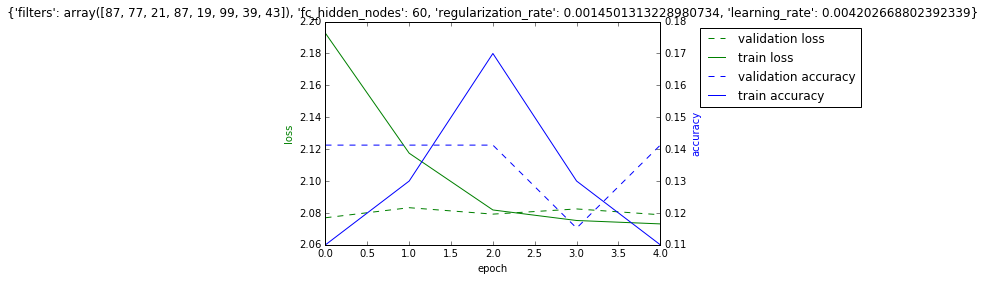

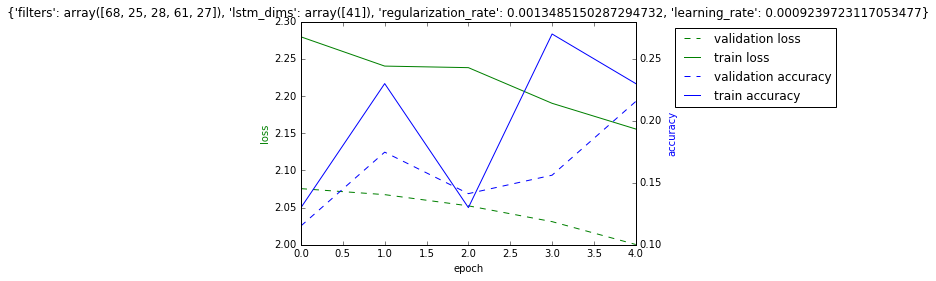

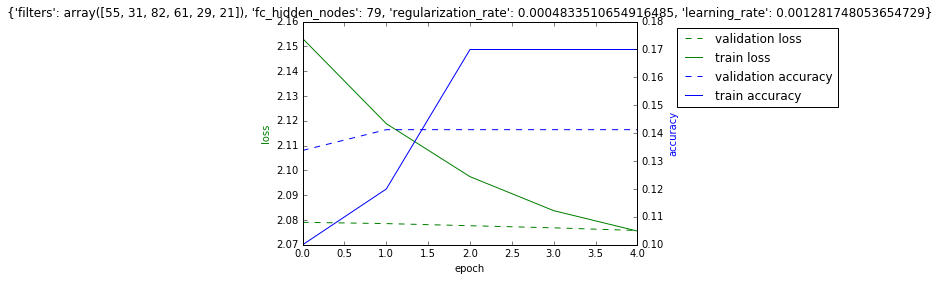

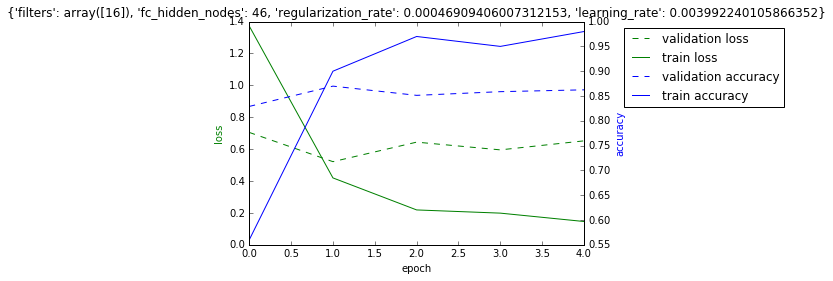

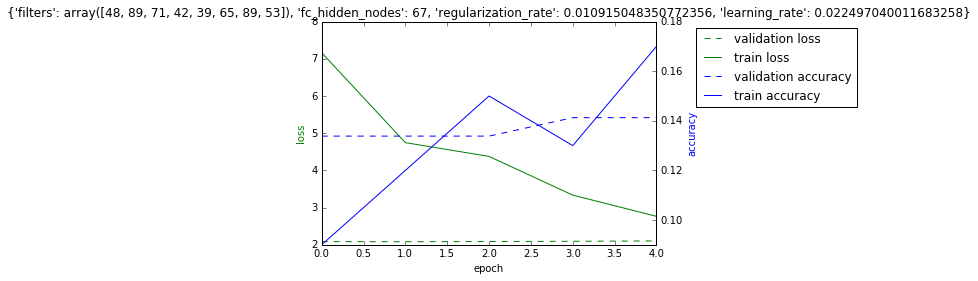

In [23]:
for i in range(len(models)):
    name = str(models[i][1])
    find_architecture.plotTrainingProcess(histories[i], name)

In [24]:
import pandas as pd

results = pd.DataFrame({'model':[str(params) for model, params, model_types in models],
                       'train_acc': [history.history['acc'][-1] for history in histories],
                       'train_loss': [history.history['loss'][-1] for history in histories],
                       'val_acc': [history.history['val_acc'][-1] for history in histories],
                       'val_loss': [history.history['val_loss'][-1] for history in histories]
                       })
results

,model,train_acc,train_loss,val_acc,val_loss
0,"{'filters': array([87, 77, 21, 87, 19, 99, 39,...",0.11,2.073113,0.141264,2.078848
1,"{'filters': array([68, 25, 28, 61, 27]), 'lstm...",0.23,2.155616,0.215613,2.000402
2,"{'filters': array([55, 31, 82, 61, 29, 21]), '...",0.17,2.075538,0.141264,2.075775
3,"{'filters': array([16]), 'fc_hidden_nodes': 46...",0.98,0.146148,0.862454,0.652001
4,"{'filters': array([48, 89, 71, 42, 39, 65, 89,...",0.17,2.764920,0.141264,2.104241


## Or do it in one command

Train on 100 samples, validate on 269 samples
Epoch 1/5
100/100 [==============================] - 5s - loss: 2.0636 - acc: 0.2000 - val_loss: 1.6266 - val_acc: 0.4201
Epoch 2/5
100/100 [==============================] - 5s - loss: 1.5968 - acc: 0.4100 - val_loss: 1.3298 - val_acc: 0.5353
Epoch 3/5
100/100 [==============================] - 5s - loss: 1.2444 - acc: 0.5300 - val_loss: 1.1577 - val_acc: 0.5725
Epoch 4/5
100/100 [==============================] - 5s - loss: 0.9928 - acc: 0.6500 - val_loss: 0.9431 - val_acc: 0.6840
Epoch 5/5
100/100 [==============================] - 5s - loss: 0.8895 - acc: 0.6700 - val_loss: 0.8288 - val_acc: 0.7584
Train on 100 samples, validate on 269 samples
Epoch 1/5
100/100 [==============================] - 11s - loss: 2.2261 - acc: 0.1400 - val_loss: 2.0971 - val_acc: 0.1227
Epoch 2/5
100/100 [==============================] - 12s - loss: 2.1656 - acc: 0.1600 - val_loss: 2.0518 - val_acc: 0.1561
Epoch 3/5
100/100 [==============================] -

/home/dafne/timeseries/mcfly/mcfly/find_architecture.py:165: UserWarning: Best model not better than kNN: 0.877323417415 vs  0.907063197026
  str(knn_acc)


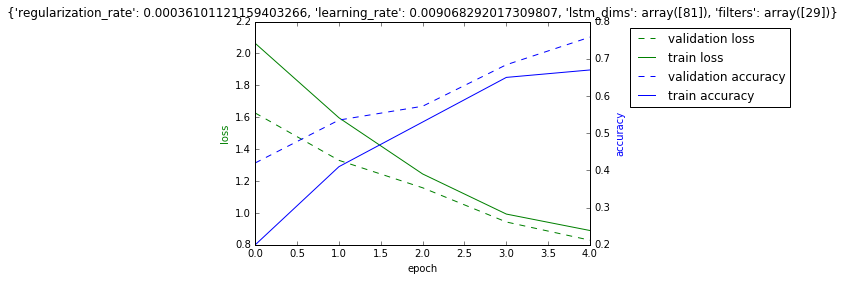

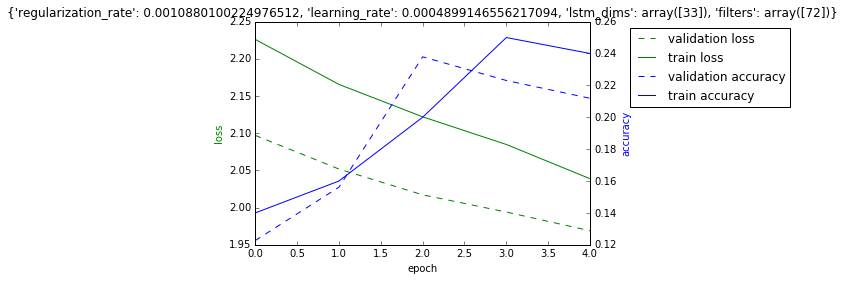

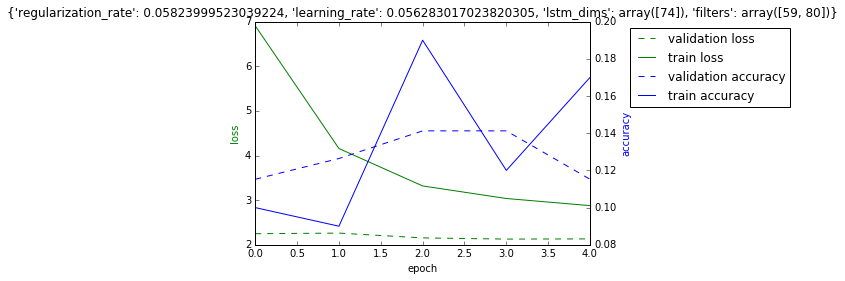

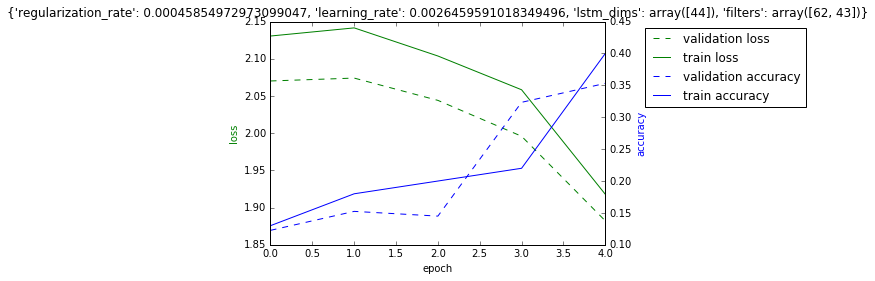

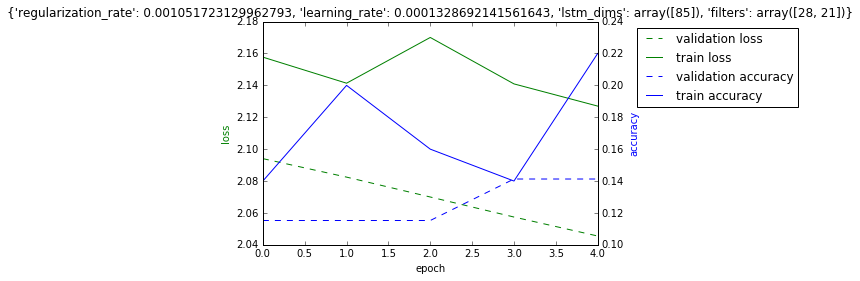

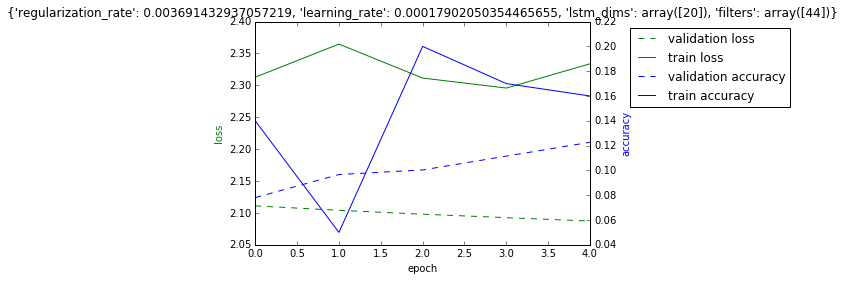

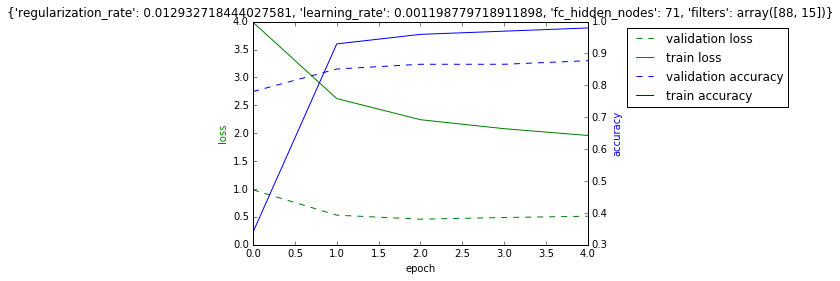

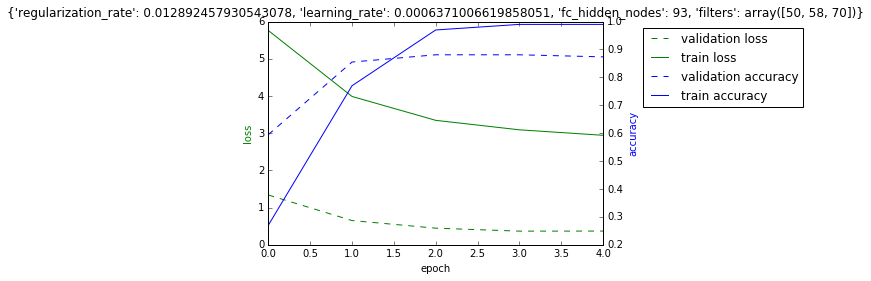

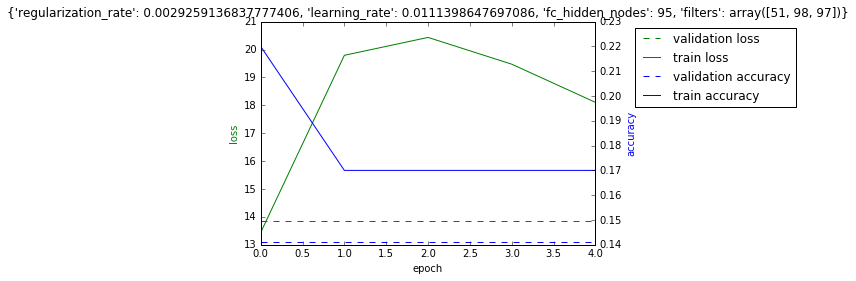

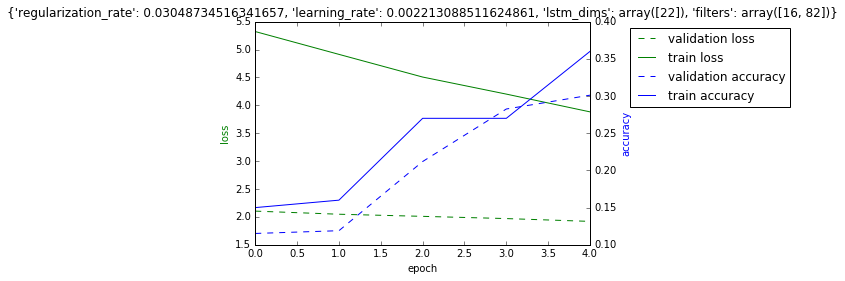

In [12]:
best_model, best_params, best_model_type, kNN = find_architecture.find_best_architecture(
    X_train, y_train_binary, X_val, y_val_binary, verbose=True, number_of_models=10,
    cnn_min_layers = 2,
                                  cnn_max_layers=4,
                                  deepconvlstm_max_conv_layers=3,
                                  deepconvlstm_max_lstm_layers=2

)

## Train the best model for real

In [14]:
#best_model_index = np.argmax(val_accuracies)
#best_model_index = 3

In [16]:
#best_model, best_params, best_model_types = models[best_model_index]
print(best_model_type, best_params)

CNN {'regularization_rate': 0.012932718444027581, 'learning_rate': 0.001198779718911898, 'fc_hidden_nodes': 71, 'filters': array([88, 15])}


In [17]:
best_model.predict_proba(X_val)

269/269 [==============================] - 0s     


array([[  9.99027848e-01,   1.10609967e-07,   7.33247241e-09, ...,
          9.72033886e-04,   9.60282787e-09,   1.89086816e-10],
       [  3.17024728e-07,   1.42035859e-07,   9.99998868e-01, ...,
          3.78361875e-07,   3.11728058e-07,   7.05827432e-13],
       [  2.28705318e-07,   2.13928097e-09,   9.99999166e-01, ...,
          4.47621638e-08,   5.75154274e-07,   4.24959330e-13],
       ..., 
       [  5.93138720e-05,   7.56540103e-05,   3.94510664e-08, ...,
          9.97848570e-01,   1.92616507e-03,   4.56252674e-05],
       [  2.15216018e-02,   1.93845183e-02,   1.84937268e-01, ...,
          7.74105251e-01,   2.39395049e-05,   2.14058559e-06],
       [  1.65393089e-07,   9.99658465e-01,   7.99652966e-08, ...,
          2.03478616e-04,   1.37816343e-04,   2.44133425e-09]])

In [18]:
nr_epochs = 10
datasize = X_train.shape[0]#1000
history = best_model.fit(X_train[:datasize,:,:], y_train_binary[:datasize,:],
              nb_epoch=nr_epochs, validation_data=(X_val, y_val_binary))

Train on 627 samples, validate on 269 samples
Epoch 1/10
627/627 [==============================] - 2s - loss: 2.2278 - acc: 0.8676 - val_loss: 0.3367 - val_acc: 0.8959
Epoch 2/10
627/627 [==============================] - 2s - loss: 1.7312 - acc: 0.9410 - val_loss: 0.2403 - val_acc: 0.9331
Epoch 3/10
627/627 [==============================] - 2s - loss: 1.4855 - acc: 0.9665 - val_loss: 0.2583 - val_acc: 0.9108
Epoch 4/10
627/627 [==============================] - 2s - loss: 1.2975 - acc: 0.9856 - val_loss: 0.2209 - val_acc: 0.9368
Epoch 5/10
627/627 [==============================] - 2s - loss: 1.1541 - acc: 0.9872 - val_loss: 0.2092 - val_acc: 0.9405
Epoch 6/10
627/627 [==============================] - 2s - loss: 1.0474 - acc: 0.9888 - val_loss: 0.1873 - val_acc: 0.9368
Epoch 7/10
627/627 [==============================] - 2s - loss: 0.9534 - acc: 0.9920 - val_loss: 0.2772 - val_acc: 0.9257
Epoch 8/10
627/627 [==============================] - 2s - loss: 0.9471 - acc: 0.9633 - val_l

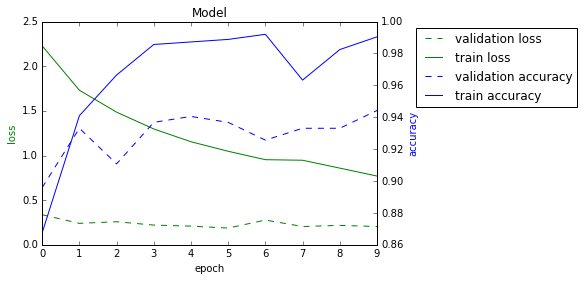

In [19]:
find_architecture.plotTrainingProcess(history)

## Test on Testset

In [ ]:
score_test = best_model.evaluate(X_test, y_test_binary, verbose=False)
print('Score of best model: ' + str(score_test))

In [ ]:
best_model.get_config()[0]